#### POT Python Optimal Transport
##### Reference: https://pythonot.github.io/quickstart.html

In [1]:
# External dependencies

import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import hilbert
from scipy.fft import fft, fftfreq, fft2, ifft2
from scipy.stats import wasserstein_distance

import ot
import ot.plot

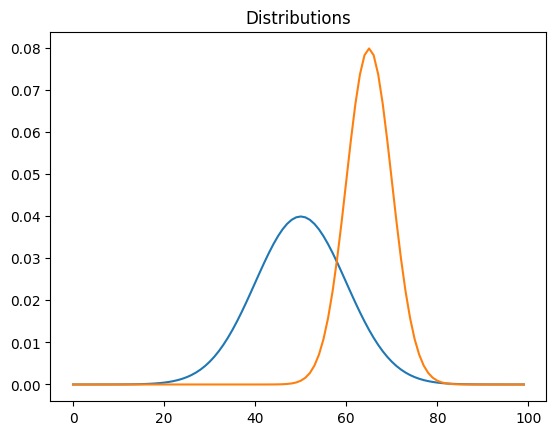

In [2]:
# Distributions

# Distribution parameters
mu_1 = 50
sigma_1 = 10
mu_2 = 65
sigma_2 = 5

# X axis
n = 100
x = np.arange(0,n)

# Functions
f1 = 1/(sigma_1 * np.sqrt(2 * np.pi)) * np.exp( - (x - mu_1)**2 / (2 * sigma_1**2) )
f2 = 1/(sigma_2 * np.sqrt(2 * np.pi)) * np.exp( - (x - mu_2)**2 / (2 * sigma_2**2) )

# Plots
plt.figure()
plt.plot(x, f1)
plt.plot(x, f2)
plt.title("Distributions")
plt.show()

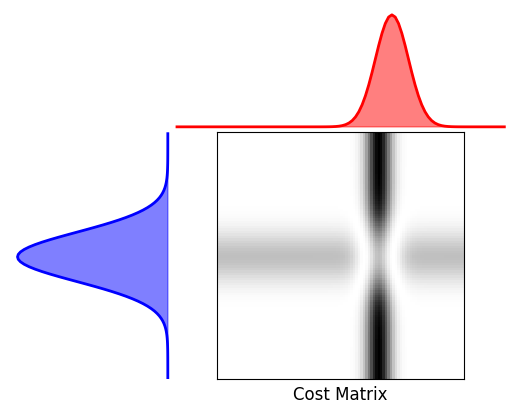

In [3]:
# Regularized OT with generic solver
# https://pythonot.github.io/auto_examples/plot_optim_OTreg.html#solve-emd

# Matrix
M = ot.dist(f1.reshape((n, 1)), f2.reshape((n, 1)), metric="sqeuclidean")
M /= M.max()

# Plot
plt.figure()
ot.plot.plot1D_mat(f1, f2, M, "Cost Matrix")
plt.show()

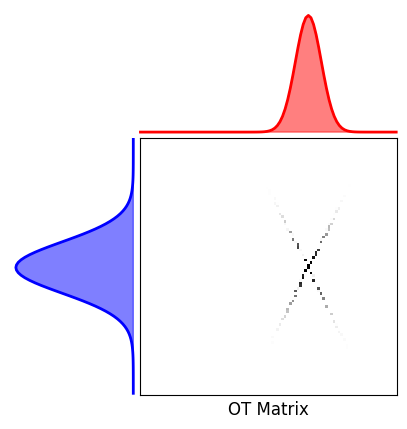

In [6]:
# Earth Movers Distance (EMD)

Dist = ot.emd(f1, f2, M)

# Plot
plt.figure(1, figsize=(5, 5))
ot.plot.plot1D_mat(f1, f2, Dist, "OT Matrix")
plt.show()